In [3]:
import bls
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
wages = bls.get_series('CIU2020000000000A')
wages.to_csv('bls_data.csv')

No Data Available for Series CIU2020000000000A Year: 2023
D:\data_analytics\lib\site-packages\bls\api.py:106: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.assign(date=pd.to_datetime(


In [5]:
cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv('cpi_data.csv')
cpi_data = pd.read_csv('cpi_data.csv')
cpi_data.columns = 'Date', 'CPI'
# CPI_data.tail(10)

In [6]:
cpi_data['Date'] = cpi_data['Date'].str.replace('-03', 'Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-06', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-09', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-12', 'Q4')

In [16]:
cpi_data['Date']

0      2004-01
1      2004-02
2       2004Q1
3      2004-04
4      2004-05
        ...   
226    2022-11
227     2022Q4
228    2023-01
229    2023-02
230     2023Q1
Name: Date, Length: 231, dtype: object

In [7]:
new_cpi_data = cpi_data[(cpi_data.Date.str.contains('-') == False )]
new_cpi_data.to_csv('cpi_cleaned_data.csv')

In [8]:
wages = bls.get_series('CIU2020000000000A')
wages.to_csv('bls_wages_data_csv')
data_frame = pd.read_csv('bls_wages_data_csv')
data_frame.columns = 'Date', 'Wages'

No Data Available for Series CIU2020000000000A Year: 2023
D:\data_analytics\lib\site-packages\bls\api.py:106: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.assign(date=pd.to_datetime(


In [23]:
data_frame.head()

,Date,Wages
0,2004Q1,2.6
1,2004Q2,2.7
2,2004Q3,2.6
3,2004Q4,2.6
4,2005Q1,2.7


In [9]:
new_data_frame = data_frame
new_num = 177.1
def process_wages(value):
    global new_num
    if type(value) is str:
        return value
    elif value:
        new_num = (value / 400) * new_num + new_num
        return new_num
    else:
        return

new_wages = new_data_frame.applymap(process_wages)

In [26]:
new_wages

,Date,Wages
0,2004Q1,178.251150
1,2004Q2,179.454345
2,2004Q3,180.620799
3,2004Q4,181.794834
4,2005Q1,183.021949
...,...,...
71,2021Q4,277.466789
72,2022Q1,280.935124
73,2022Q2,284.938449
74,2022Q3,288.642649


In [10]:
merged_data = pd.merge(new_cpi_data, new_wages, on='Date')
merged_data.tail

<bound method NDFrame.tail of       Date      CPI       Wages
0   2004Q1  187.400  178.251150
1   2004Q2  189.700  179.454345
2   2004Q3  189.900  180.620799
3   2004Q4  190.300  181.794834
4   2005Q1  193.300  183.021949
..     ...      ...         ...
71  2021Q4  278.802  277.466789
72  2022Q1  287.504  280.935124
73  2022Q2  296.311  284.938449
74  2022Q3  296.808  288.642649
75  2022Q4  296.797  292.322843

[76 rows x 3 columns]>

Text(0.5, 0, 'Dates')

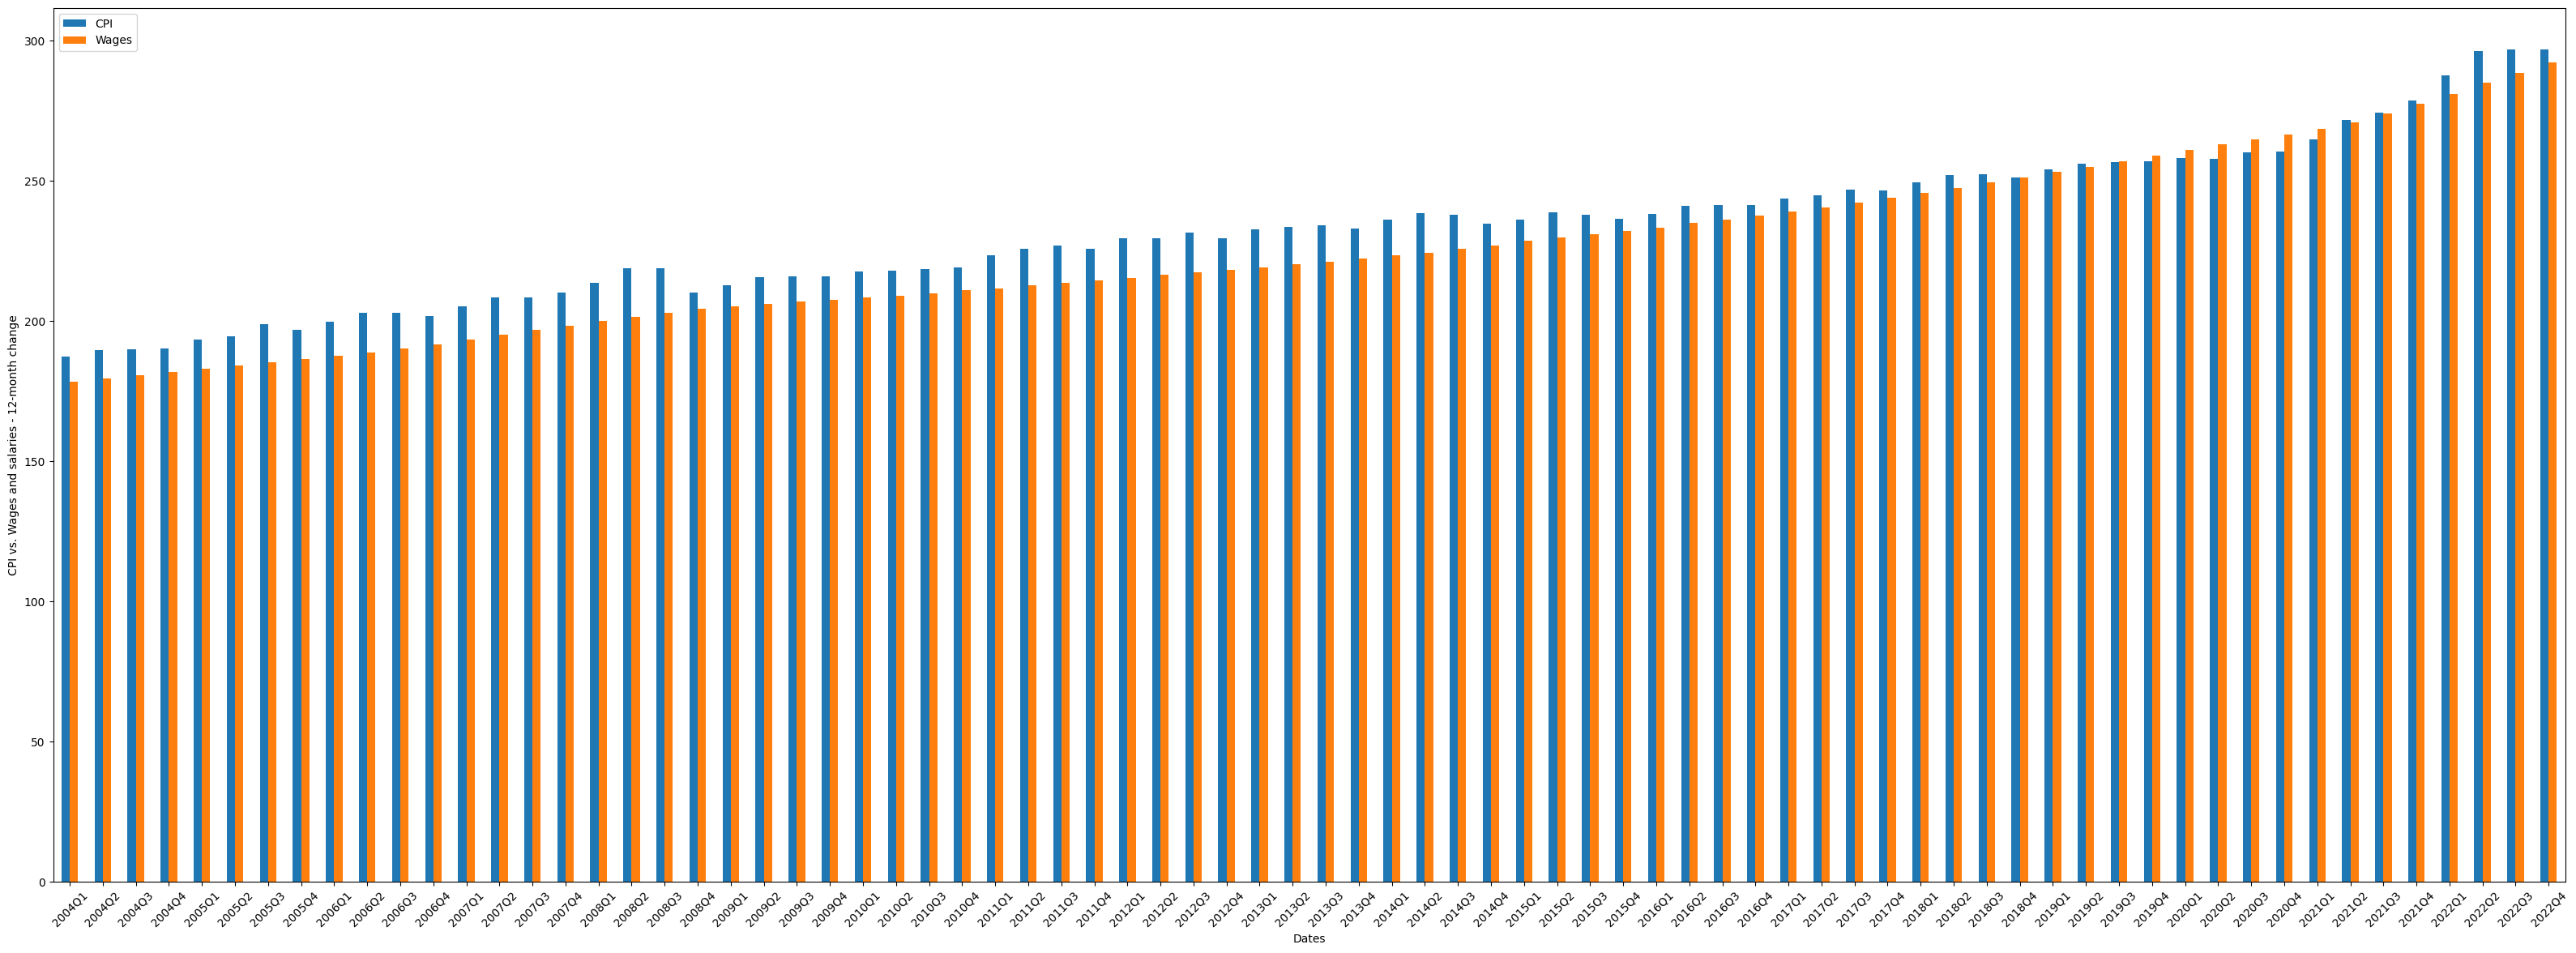

In [11]:
ax = merged_data.plot(kind='bar', figsize=(40, 14))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')

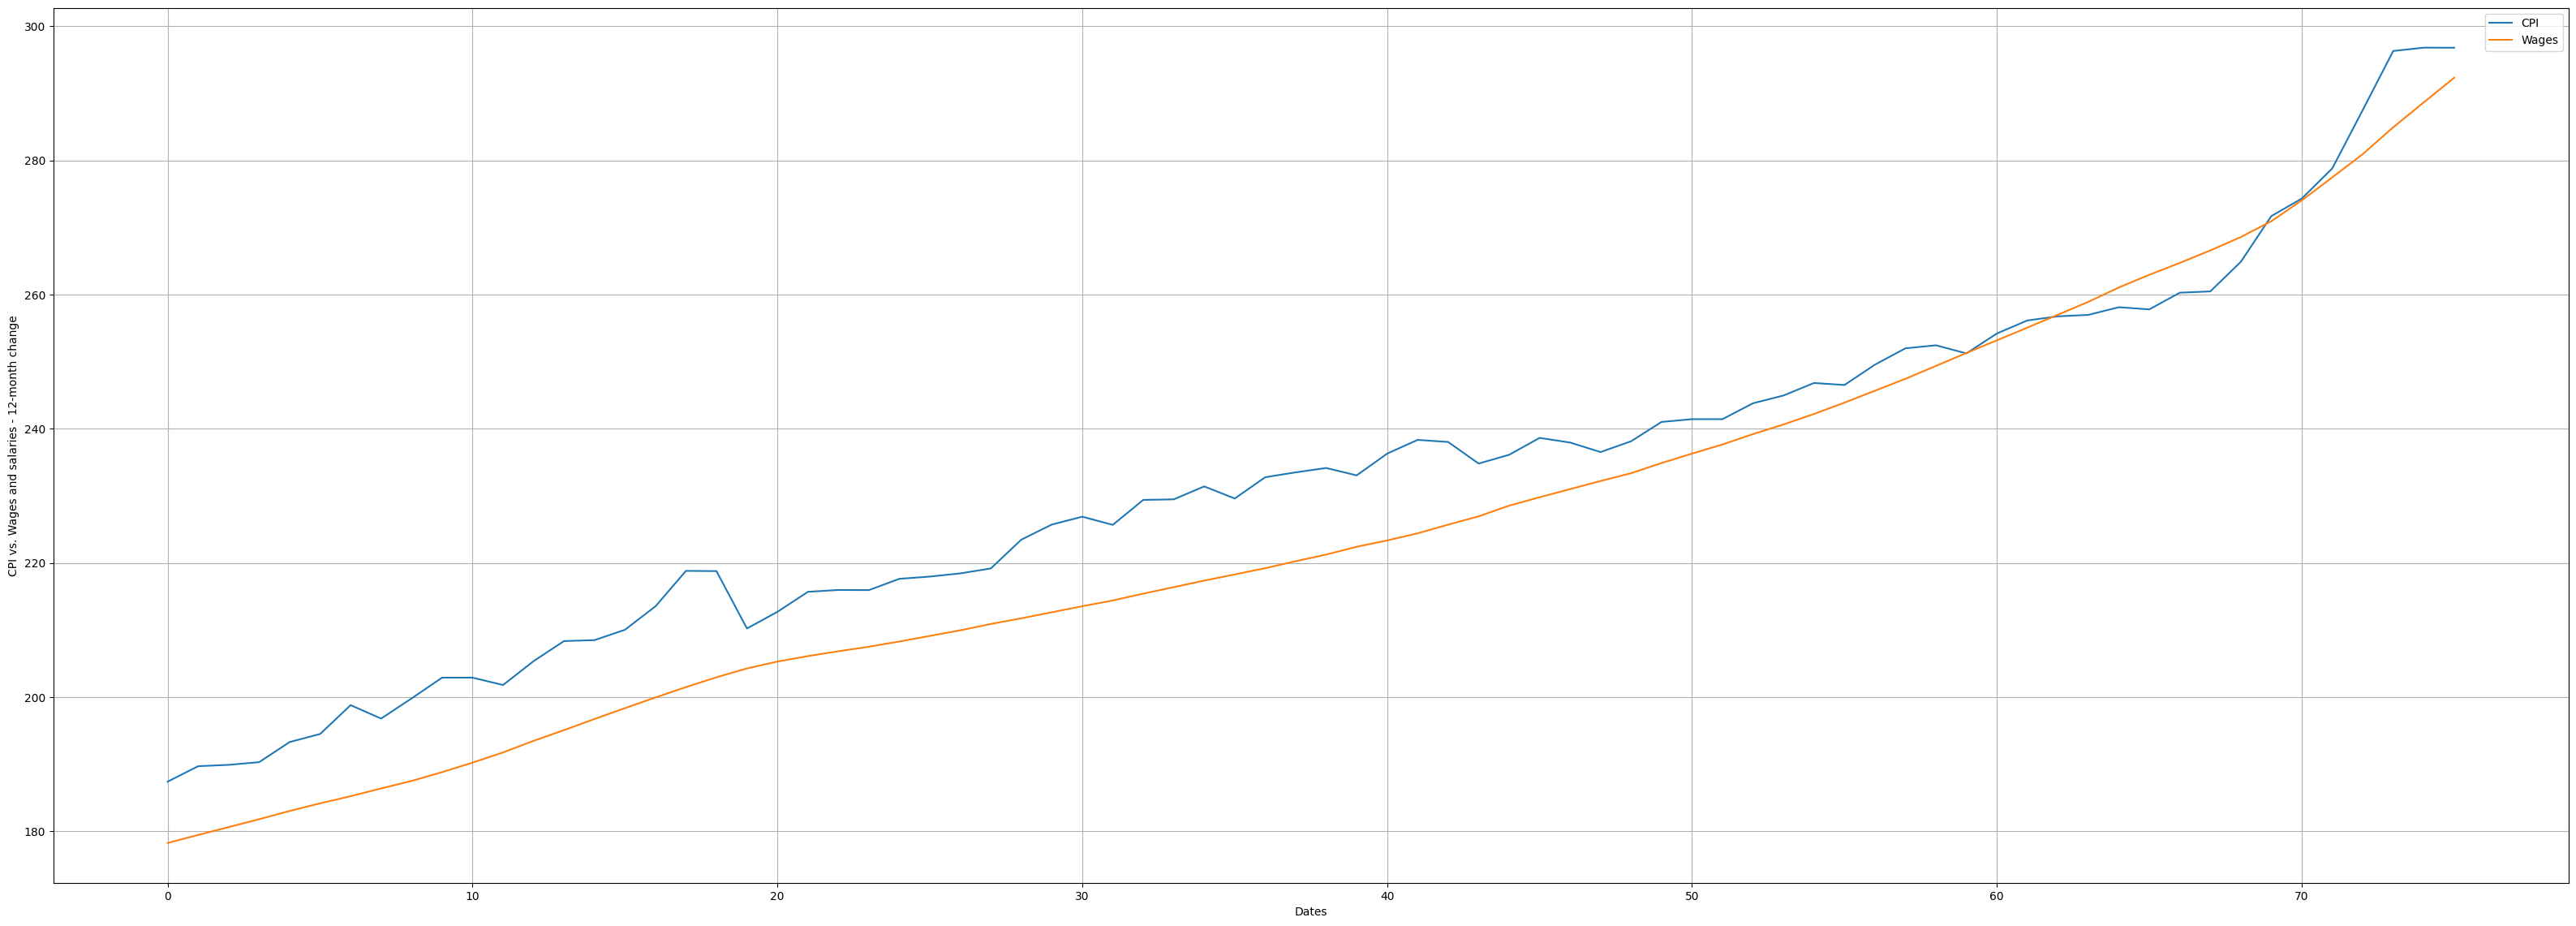

In [12]:
ax = merged_data.plot(kind='line', figsize=(40, 14))
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')
ax.grid()